In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.reshape(x_train, (60000,784))/255.0
x_test = np.reshape(x_test, (10000,784))/255.0
y_train = np.matrix(np.eye(10)[y_train])
y_test = np.matrix(np.eye(10)[y_test])

# Input 784 nodes (28x28 pixel)
print(x_train.shape)
# 10 output nodes represent digital numbers ranging from 0 to 9.
print(y_train.shape)


(60000, 784)
(60000, 10)


In [2]:
# Define active function.

def sigmoid(x):
     return 1. / (1. +np.exp(-x))
def softmax(x):
     return np.divide(np.matrix(np.exp(x)),np.mat(np.sum(np.exp(x),axis=1)))

In [3]:
def Forwardpass(X,Wh1,bh1,Wh2,bh2,Wo,bo):
     zh1 = X@Wh1.T + bh1
     a = sigmoid(zh1) # output of layer 1

     zh2 = a@Wh2.T + bh2 
     b = sigmoid(zh2) # output of layer 2

     z = b@Wo.T + bo
     o = softmax(z) # output 
     return o
    
def AccTest(label,prediction): # calculate the matching score
     OutMaxArg=np.argmax(prediction,axis=1)
     LabelMaxArg=np.argmax(label,axis=1)
     Accuracy=np.mean(OutMaxArg==LabelMaxArg)
     return Accuracy


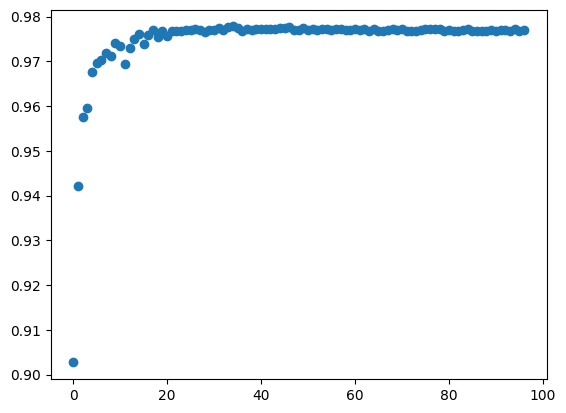

In [ ]:
from IPython.display import clear_output
loss = []
Acc = []
Batch_size = 200
Stochastic_samples = np.arange(NumTrainSamples)

dwo_prev = dWo.copy()
dbo_prev = dbo.copy()
dbh2_prev = dbh2.copy()
dWh2_prev = dWh2.copy()
dWh1_prev = dWh1.copy()
dbh1_prev = dbh1.copy()

for ep in range (Epoch):
 np.random.shuffle(Stochastic_samples)
 for ite in range (0,NumTrainSamples,Batch_size): 
     #feed fordware propagation
     Batch_samples = Stochastic_samples[ite:ite+Batch_size]
     x = x_train[Batch_samples,:]
     y = y_train[Batch_samples,:]
        
     zh1 = x@Wh1.T + bh1
     a = sigmoid(zh1)
     zh2 = a@Wh2.T + bh2
     b = sigmoid(zh2)
     z = b@Wo.T + bo
     o = softmax(z)
        
     #calculate loss
     loss.append(-np.sum(np.multiply(y,np.log10(o))))
        
     #calculate the error for the ouput layer
     d = o - y

     #Back propagate error
     dh2 = d@Wo
     dhs2 = np.multiply(np.multiply(dh2,b),(1-b))
    
     dh1 = dh2@Wh2
     dhs1 = np.multiply(np.multiply(dh1,a),(1-a))
    
     dWo = np.matmul(np.transpose(d),b)
     dbo = np.mean(d) 
    
     dWh2 = np.matmul(np.transpose(dhs2),a)
     dbh2 = np.mean(dhs2)

     dWh1 = np.matmul(np.transpose(dhs1),x)
     dbh1 = np.mean(dhs1) 

     # Update weight 
     Wo = Wo - ( learningRate * dWo + dwo_prev ) / Batch_size
     bo = bo - learningRate * dbo + dbo_prev
     Wh2 = Wh2 - ( learningRate * dWh2 + dWh2_prev ) / Batch_size
     bh2 = bh2 - learningRate * dbh2 + dbh2_prev
     Wh1 = Wh1 - ( learningRate * dWh1 + dWh1_prev ) / Batch_size
     bh1 = bh1 - learningRate * dbh1 + dbh1_prev

     dwo_prev = 0.9 * dWo
     dbo_prev = 0.9 * dbo

     dbh2_prev = 0.9 * dbh2
     dWh2_prev = 0.9 * dWh2

     dWh1_prev = 0.9 * dWh1
     dbh1_prev = 0.9 * dbh1
 
 #Test accuracy with random innitial weights
 prediction = Forwardpass(x_test,Wh1,bh1,Wh2,bh2,Wo,bo)
 Acc.append(AccTest(y_test,prediction))
 clear_output(wait=True)
 plt.plot([i for i, _ in enumerate(Acc)],Acc,'o')
 plt.show()